### basic imports

In [1]:
import collections
import random
from math import *
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import scipy
import random
import random as rng
from scipy.special import binom as binom_sp
import scipy.special as ss
from math import comb as binom

### Some basic functions

In [2]:
from optimize import HHH, H, binomH, time7diss, time11diss, float_range, check_constraints, wrap, round_to_str
from optimize import round_upwards_to_str, xlx, p_good, g, f, p_good_2, p_good_2_aux, H1, Hi

### Some basic list functions

In [3]:
from optimize import _list_merge_async_complexity, _list_merge_complexity, _gaussian_elimination_complexity, _optimize_m4ri, _mem_matrix

### BCJ

In [4]:
from optimize import optimize_bcj, BCJ_BBSS_memlimit

# this is just an example of how to call the function
print(optimize_bcj())

memory  0.2837051615466519
Validity:  True
Time:  0.2966
l1 0.2163
l2 0.2200
l3 0.2709
L1 0.2583
L2 0.2838
L3 0.2481
L4 0.0001
alpha1 0.0029
alpha2 0.0087
alpha3 0.0192
r1 0.2163
r2 0.4229
r3 0.7337
Checking that the constraints are satisfied:
[('eq', 1.2673001537066853e-11), ('eq', 1.0625167412570136e-11), ('eq', 2.2526425169644426e-13), ('eq', -2.450212195669905e-13), ('ineq', 2.990065264829589e-08), ('ineq', 3.5550451471522138e-12), ('ineq', -1.504352198367087e-14), ('ineq', 0.292989196445003), ('ineq', 0.31080415188890037), ('ineq', 0.20660536919401007), ('ineq', 0.7162948384533481), ('ineq', 8.206642587715862e-10), ('ineq', 0.013304794781268059), ('ineq', 1.224993589898915e-08), ('ineq', 0.007209177052665973), ('ineq', 0.014865774862711196)]
0.2965206259372975


In [5]:
# compute the runtime for every memory limitation
BCJ_ORG = BCJ_BBSS_memlimit(False, False, 0.02)
BCJ_TMTO = BCJ_BBSS_memlimit(False, True, 0.02)

Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  True
Time:  0.2894
0.28933552479930225 0.29
Validity:  False
Time:  0.2985
0.29841243308853954 0.270000000000000
Validity:  False
Time:  0.2985
0.29841243308853954 0.270000000000000
Validity:  False
Time:  0.2985
0.29841243308853954 0.270000000000000
Validity:  False
Time:  0.2985
0.29841243308853954 0.270000000000000
Validity:  False
Time:  0.2985
0.29841243308853954 0.270000000000000
Validity:  False
Time:  0.2985
0.29841243308853954 0.270000000000000
Validity:  False
Time:  0.2985
0.298

Validity:  True
Time:  0.3141
0.31403415059661055 0.250000000000000
Validity:  True
Time:  0.3594
0.3593509872986286 0.250000000000000
Validity:  True
Time:  0.3174
0.3173530409125278 0.250000000000000
Validity:  True
Time:  0.3149
0.3148554529646932 0.250000000000000
Validity:  True
Time:  0.3228
0.3227533334023915 0.250000000000000
Validity:  True
Time:  0.3148
0.31471185693931863 0.250000000000000
Validity:  True
Time:  0.3146
0.314525403165963 0.250000000000000
Validity:  True
Time:  0.3138
0.313716152678745 0.250000000000000
Validity:  True
Time:  0.3209
0.32083335672219326 0.250000000000000
Validity:  True
Time:  0.3179
0.31789788673772973 0.250000000000000
Validity:  True
Time:  0.3559
0.355868104275867 0.230000000000000
Validity:  False
Time:  0.3559
0.3558681144351692 0.230000000000000
Validity:  True
Time:  0.3560
0.3559031302315958 0.230000000000000
Validity:  True
Time:  0.3630
0.36290017484443926 0.230000000000000
Validity:  True
Time:  0.3559
0.3558687149047193 0.23000000

In [6]:
# example of how the data looks
BCJ_TMTO

[[0.29, 0.2894486800918431],
 [0.270000000000000, 0.2982848446966978],
 [0.250000000000000, 0.313716152678745],
 [0.230000000000000, 0.355868104275867],
 [0.210000000000000, 0.40450378698394257],
 [0.190000000000000, 0.476443288326636],
 [0.170000000000000, 0.5720776659163088],
 [0.150000000000000, 0.6857153849535369],
 [0.130000000000000, 0.8091903720052664],
 [0.110000000000000, 0.9349523379044086],
 [0.0900000000000000, 1.0656808724353055],
 [0.0700000000000000, 1.22725108815767],
 [0.0500000000000000, 2]]

In [7]:
BCJ_ORG

[[0.29, 0.28933552479930225],
 [0.270000000000000, 0.29841243308853954],
 [0.250000000000000, 2],
 [0.230000000000000, 2],
 [0.210000000000000, 2],
 [0.190000000000000, 2],
 [0.170000000000000, 2],
 [0.150000000000000, 2],
 [0.130000000000000, 2],
 [0.110000000000000, 2],
 [0.0900000000000000, 2],
 [0.0700000000000000, 2],
 [0.0500000000000000, 2]]

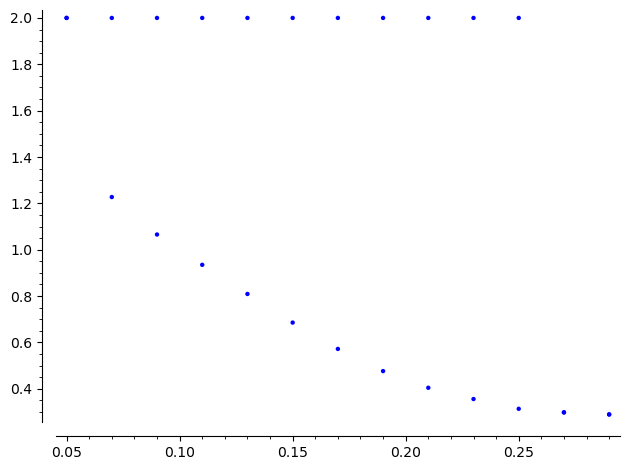

In [8]:
BCJ_ORG_PLOT = list_plot(BCJ_ORG)
BCJ_TMTO_PLOT = list_plot(BCJ_TMTO)
BCJ_ORG_PLOT + BCJ_TMTO_PLOT

### BBSS

In [9]:
from optimize import optimize_bbss, BCJ_BBSS_memlimit

# this is just an example of how to call the function
print(optimize_bbss())

memory  0.2934225208588932
Validity:  True
Time:  0.3007
p0 -0.1724
p1 -0.0374
p2 -0.0072
l1 0.2576
l2 0.2935
l3 0.2523
l4 0.2042
c1 0.6517
c2 0.3599
c3 0.1562
alpha1 0.0118
alpha2 0.0105
alpha3 0.0057
gamma1 0.0000
gamma2 0.0000
gamma3 0.0000
Checking that the constraints are satisfied:
[('eq', 1.5357159988127478e-12), ('eq', -3.005785897958191e-11), ('eq', 1.0581813203458523e-15), ('eq', 0.0), ('eq', 0.0), ('eq', 0.0), ('ineq', 0.0070388382864722265), ('ineq', 4.440892098500626e-16), ('ineq', -1.942890293094024e-15), ('ineq', 9.71445146547012e-16), ('ineq', 0.0045310092438874605), ('ineq', 0.0004144136209643847), ('ineq', 0.01174063491831139), ('ineq', 0.010401326703043156), ('ineq', 0.0056150769724859625), ('ineq', 0.7065774791411068), ('ineq', -0.0), ('ineq', -0.0), ('ineq', -0.0)]
0.3006573285826744


### optimize for all memory limits

In [10]:
# compute the runtime for every memory limitation
BBSS_ORG = BCJ_BBSS_memlimit(True, False, 0.02)
BBSS_TMTO = BCJ_BBSS_memlimit(True, True, 0.02)

Validity:  True
Time:  0.2896
0.28953378964232207 0.29
Validity:  True
Time:  0.3395
0.3394348040573488 0.29
Validity:  True
Time:  0.2893
0.289221547685759 0.29
Validity:  True
Time:  0.3395
0.3394348039395739 0.29
Validity:  True
Time:  0.2892
0.2891575943023888 0.29
Validity:  True
Time:  0.2955
0.2954035341607397 0.29
Validity:  True
Time:  0.2892
0.2891475521160243 0.29
Validity:  True
Time:  0.2936
0.29357649378627937 0.29
Validity:  True
Time:  0.3395
0.3394348039711277 0.29
Validity:  True
Time:  0.2892
0.28914540699197416 0.29
Validity:  True
Time:  0.3379
0.3378750422805749 0.270000000000000
Validity:  True
Time:  0.2986
0.29852616018244693 0.270000000000000
Validity:  True
Time:  0.3587
0.3586684578046828 0.270000000000000
Validity:  True
Time:  0.3587
0.3586684587424473 0.270000000000000
Validity:  True
Time:  0.3587
0.3586684583713077 0.270000000000000
Validity:  True
Time:  0.2985
0.29841254666372324 0.270000000000000
Validity:  True
Time:  0.3587
0.35866845863135505 0.27

/nix/store/8966bvqlmx7jxnd8bh3m9jh19mvqcxha-python3-3.10.12-env/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Validity:  False
Time:  0.4359
inf 0.150000000000000
Validity:  False
Time:  0.4823
inf 0.150000000000000
Validity:  False
Time:  0.4831
inf 0.150000000000000
Validity:  False
Time:  0.6204
inf 0.150000000000000
Validity:  False
Time:  0.4831
inf 0.150000000000000
Validity:  False
Time:  1.5781
inf 0.150000000000000
Validity:  False
Time:  1.6640
inf 0.130000000000000
Validity:  False
Time:  0.3490
inf 0.130000000000000
Validity:  False
Time:  1.2141
inf 0.130000000000000
Validity:  False
Time:  0.4998
inf 0.130000000000000
Validity:  False
Time:  0.1687
inf 0.130000000000000
Validity:  False
Time:  0.5424
inf 0.130000000000000
Validity:  False
Time:  0.1896
inf 0.130000000000000
Validity:  False
Time:  0.4611
inf 0.130000000000000
Validity:  False
Time:  0.1671
inf 0.130000000000000
Validity:  False
Time:  0.6618
inf 0.130000000000000
Validity:  False
Time:  0.4807
inf 0.110000000000000
Validity:  False
Time:  0.5105
inf 0.110000000000000
Validity:  False
Time:  0.5805
inf 0.110000000

Validity:  True
Time:  0.4613
0.46121112061547076 0.150000000000000
Validity:  True
Time:  0.5268
0.5267809441018078 0.130000000000000
Validity:  True
Time:  0.5188
0.5187836206326548 0.130000000000000
Validity:  True
Time:  0.5117
0.5116347180510422 0.130000000000000
Validity:  True
Time:  0.5276
0.5275206084933051 0.130000000000000
Validity:  True
Time:  0.5280
0.5279286590228118 0.130000000000000
Validity:  True
Time:  0.5144
0.5143268261571216 0.130000000000000
Validity:  True
Time:  0.5116
0.5115353523776556 0.130000000000000
Validity:  True
Time:  0.5116
0.5115373895104437 0.130000000000000
Validity:  True
Time:  0.5116
0.5115390448276734 0.130000000000000
Validity:  True
Time:  0.5221
0.5220310247365805 0.130000000000000
Validity:  True
Time:  0.7430
0.7429160377017733 0.110000000000000
Validity:  True
Time:  0.6196
0.6195615749918614 0.110000000000000
Validity:  True
Time:  0.5778
0.5777871733029665 0.110000000000000
Validity:  True
Time:  0.5662
0.5661061248432757 0.1100000000

In [11]:
# example of how the data looks
BBSS_TMTO

[[0.29, 0.2891453502615843],
 [0.270000000000000, 0.29448536006740256],
 [0.250000000000000, 0.3133074346650877],
 [0.230000000000000, 0.33391013563788174],
 [0.210000000000000, 0.35520265850805643],
 [0.190000000000000, 0.37732106711605057],
 [0.170000000000000, 0.41167261043466985],
 [0.150000000000000, 0.4611929479990577],
 [0.130000000000000, 0.5115353523776556],
 [0.110000000000000, 0.5629397413115921],
 [0.0900000000000000, 0.615830668368665],
 [0.0700000000000000, 0.6710626467801922],
 [0.0500000000000000, 0.7366172006348534]]

In [13]:
BBSS_ORG

[[0.29, 0.28914540699197416],
 [0.270000000000000, 0.29841254666372324],
 [0.250000000000000, 0.32819021275259863],
 [0.230000000000000, 0.3607296995672342],
 [0.210000000000000, 0.3973889862276456],
 [0.190000000000000, 0.44452629013044054],
 [0.170000000000000, 0.5014438908120877],
 [0.150000000000000, 2],
 [0.130000000000000, 2],
 [0.110000000000000, 2],
 [0.0900000000000000, 2],
 [0.0700000000000000, 2],
 [0.0500000000000000, 2]]

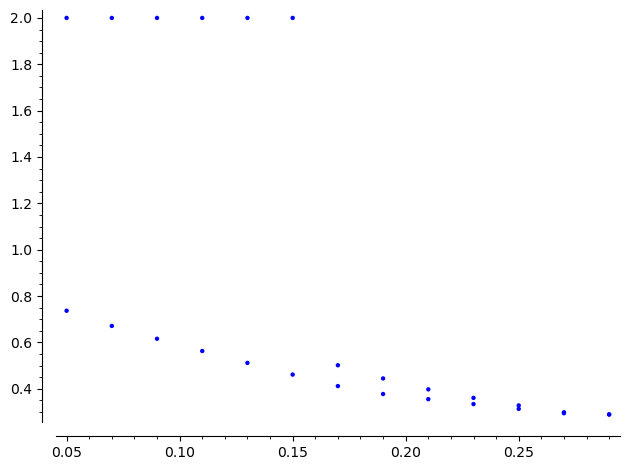

In [12]:
BBSS_ORG_PLOT = list_plot(BBSS_ORG)
BBSS_TMTO_PLOT = list_plot(BBSS_TMTO)
BBSS_ORG_PLOT + BBSS_TMTO_PLOT

# Code based optimisations

### BJMM

In [5]:
### BJMM
k = 0.448 #0.426 FD
w = Hi(1 - k)/2

In [6]:
from optimize import optimize_bjmm, optimize_mem_bjmm, optimize_k_bjmm

# just an example of usage
print(optimize_bjmm(k=k, w=w, verb=True, membound=1., iters=10000))

Validity:  True
Time:  0.05071824296730623
l 0.0555
p 0.0102
p1 0.0043
p2 0.0076
L0 0.0178
L1 0.0224
L2 0.0239
r1 0.0132
r2 0.0329
Checking that the constraints are satisfied:
[('ineq', 0.0009788481781612445), ('ineq', 0.00501801790418732), ('ineq', 0.019705207218836167), ('ineq', 0.02264979457866803), ('eq', 1.061238315107349e-08), ('eq', 9.477310568273278e-09), ('eq', 7.468358639850514e-10), ('eq', 1.4936717279701028e-09), ('eq', 3.1032280911613697e-11), ('ineq', 0.976096823527927)]
0.05071824296730623


In [7]:
optimize_mem_bjmm(retries=5, min_bound=0.001, max_bound=0.1, step=0.001)

/nix/store/8966bvqlmx7jxnd8bh3m9jh19mvqcxha-python3-3.10.12-env/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


0.05860760865378859 0.01
0.0512772164108556 0.02
0.04997133092626997 0.03
0.04925358278062468 0.04
0.05871094310699192 0.05
0.04941774190283378 0.060000000000000005
0.04952130282418358 0.07
inf 0.08
0.049581248967684156 0.09
0.0497066701033293 0.09999999999999999
0.04941494693163094 0.10999999999999999
0.049173563550340305 0.11999999999999998
0.0493764518624913 0.12999999999999998
inf 0.13999999999999999
0.05365035629140597 0.15
0.04918586330453696 0.16
0.04918785385211029 0.17
0.049194522758757755 0.18000000000000002
0.049813671361186404 0.19000000000000003


[[0.01, 0.05860760865378859],
 [0.02, 0.0512772164108556],
 [0.03, 0.04997133092626997],
 [0.04, 0.04925358278062468],
 [0.05, 0.05871094310699192],
 [0.060000000000000005, 0.04941774190283378],
 [0.07, 0.04952130282418358],
 [0.08, inf],
 [0.09, 0.049581248967684156],
 [0.09999999999999999, 0.0497066701033293],
 [0.10999999999999999, 0.04941494693163094],
 [0.11999999999999998, 0.049173563550340305],
 [0.12999999999999998, 0.0493764518624913],
 [0.13999999999999999, inf],
 [0.15, 0.05365035629140597],
 [0.16, 0.04918586330453696],
 [0.17, 0.04918785385211029],
 [0.18000000000000002, 0.049194522758757755],
 [0.19000000000000003, 0.049813671361186404]]

In [8]:
optimize_k_bjmm(retries=5, half_distance=True)

0.0 0.25 0.01787530592888259
0.1 0.15800967316180328 0.023996925870063718
0.2 0.12150192690447681 0.0368652766798655
0.30000000000000004 0.09464885268531247 0.045428856639142964
0.4 0.07305120170594331 0.04955005407105734


[[0.0, 0.25, 0.01787530592888259],
 [0.1, 0.15800967316180328, 0.023996925870063718],
 [0.2, 0.12150192690447681, 0.0368652766798655],
 [0.30000000000000004, 0.09464885268531247, 0.045428856639142964],
 [0.4, 0.07305120170594331, 0.04955005407105734]]

### New BJMM

In [9]:
k = 0.448 #0.426 FD
w = Hi(1 - k)/2

In [10]:
from optimize import optimize_new_bjmm, optimize_mem_new_bjmm, optimize_k_new_bjmm

# just an example of usage
optimize_new_bjmm(k=k, w=w, verb=True, membound=1., iters=10000)

Validity:  True
Time:  0.0572231150003174
l 0.0600
p 0.0200
p1 0.0057
p2 0.0104
L1 0.0227
L2 0.0288
L3 0.0152
r1 0.0166
r2 0.0247
l1 0.0166
l2 0.0247
Checking that the constraints are satisfied:
[('ineq', 0.001099440435766803), ('ineq', 0.0008158884746472216), ('eq', 1.2482242871258986e-08), ('eq', 1.0652784210307686e-11), ('ineq', 0.018705889343751572), ('ineq', 0.0), ('ineq', 1.6465995233971853e-14), ('eq', 5.885924837800705e-10), ('eq', 1.177184964090694e-09), ('eq', 3.8367399535221836e-13), ('ineq', 0.9712017132944838)]


0.0572231150003174

In [11]:
# optimizer over all memory limitations
optimize_mem_new_bjmm(retries=5, min_bound=0.001, max_bound=0.1, step=0.001)

inf 0.01
0.06280687139323854 0.02
0.052479736341816255 0.03
0.05195745083219949 0.04
0.05177993015074892 0.05
0.051781489152357106 0.060000000000000005
0.057572356971055644 0.07
0.05359652658910342 0.08
0.051514955432407764 0.09
0.05178092725352834 0.09999999999999999
0.05161467842511189 0.10999999999999999
0.05169937130800474 0.11999999999999998
0.05181905777332747 0.12999999999999998
inf 0.13999999999999999
0.05170899562002559 0.15
0.05165255039419348 0.16
0.05859384854359033 0.17
0.05214392270567571 0.18000000000000002
0.051528715834666075 0.19000000000000003


[[0.01, inf],
 [0.02, 0.06280687139323854],
 [0.03, 0.052479736341816255],
 [0.04, 0.05195745083219949],
 [0.05, 0.05177993015074892],
 [0.060000000000000005, 0.051781489152357106],
 [0.07, 0.057572356971055644],
 [0.08, 0.05359652658910342],
 [0.09, 0.051514955432407764],
 [0.09999999999999999, 0.05178092725352834],
 [0.10999999999999999, 0.05161467842511189],
 [0.11999999999999998, 0.05169937130800474],
 [0.12999999999999998, 0.05181905777332747],
 [0.13999999999999999, inf],
 [0.15, 0.05170899562002559],
 [0.16, 0.05165255039419348],
 [0.17, 0.05859384854359033],
 [0.18000000000000002, 0.05214392270567571],
 [0.19000000000000003, 0.051528715834666075]]

In [12]:
# optimize over all code rates
optimize_k_new_bjmm(retries=5, half_distance=True)

0.1 0.15800967316180328 0.03308241237949095
0.2 0.12150192690447681 0.04273680716523432
0.30000000000000004 0.09464885268531247 0.05383918285143645
0.4 0.07305120170594331 0.05194188952595359


[[0.1, 0.15800967316180328, 0.03308241237949095],
 [0.2, 0.12150192690447681, 0.04273680716523432],
 [0.30000000000000004, 0.09464885268531247, 0.05383918285143645],
 [0.4, 0.07305120170594331, 0.05194188952595359]]

### MMT

In [13]:
from optimize import optimize_mmt, optimize_mem_mmt, optimize_k_mmt

# just an example of usage
optimize_mmt(k=k, w=w, verb=True, membound=1., iters=10000)

Validity:  True
Time:  0.053589473570182164
l 0.0286
p 0.0066
L1 0.0143
L2 0.0219
L3 0.0219
r1 0.0066
Checking that the constraints are satisfied:
[('eq', 1.0800066570226807e-10), ('eq', -3.469446951953614e-18), ('eq', 0.0), ('eq', 0.0), ('ineq', 0.9780747272061047)]


(True,
 0.053589473570182164,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.053589473570182164
        x: [ 2.857e-02  6.641e-03  1.428e-02  2.193e-02  2.193e-02
             6.641e-03]
      nit: 34
      jac: [ 1.472e-01 -3.123e+00  0.000e+00  0.000e+00  1.000e+00
             0.000e+00]
     nfev: 338
     njev: 34)

In [20]:
optimize_mem_mmt(retries=10, min_bound=0.001, max_bound=0.1, step=0.001)

0.05697453927473716 0.001
0.05658398966125635 0.002
0.0562354644187958 0.003
0.055919298667011674 0.004
0.0556304846594201 0.005
0.05536584243068368 0.006
0.055123202913914586 0.007
0.05490095133440483 0.008
0.054697855752539555 0.009000000000000001
0.05451294517885893 0.010000000000000002
0.05434543156668456 0.011000000000000003
0.054194679906266245 0.012000000000000004
0.05406014987920409 0.013000000000000005
0.053941378146295335 0.014000000000000005
0.05383801155338065 0.015000000000000006
0.05374972344970235 0.016000000000000007
0.05367622878472765 0.017000000000000008
0.05361730433840128 0.01800000000000001
0.053572754525695314 0.01900000000000001
0.05354241263662156 0.02000000000000001
0.05352614992962625 0.02100000000000001
0.053523066044140186 0.022000000000000013
0.053523058790985775 0.023000000000000013
0.053523142997851415 0.024000000000000014
0.05352306370519862 0.025000000000000015
0.05352306978609638 0.026000000000000016
0.053523045475577555 0.027000000000000017
0.0535230

[[0.001, 0.05697453927473716],
 [0.002, 0.05658398966125635],
 [0.003, 0.0562354644187958],
 [0.004, 0.055919298667011674],
 [0.005, 0.0556304846594201],
 [0.006, 0.05536584243068368],
 [0.007, 0.055123202913914586],
 [0.008, 0.05490095133440483],
 [0.009000000000000001, 0.054697855752539555],
 [0.010000000000000002, 0.05451294517885893],
 [0.011000000000000003, 0.05434543156668456],
 [0.012000000000000004, 0.054194679906266245],
 [0.013000000000000005, 0.05406014987920409],
 [0.014000000000000005, 0.053941378146295335],
 [0.015000000000000006, 0.05383801155338065],
 [0.016000000000000007, 0.05374972344970235],
 [0.017000000000000008, 0.05367622878472765],
 [0.01800000000000001, 0.05361730433840128],
 [0.01900000000000001, 0.053572754525695314],
 [0.02000000000000001, 0.05354241263662156],
 [0.02100000000000001, 0.05352614992962625],
 [0.022000000000000013, 0.053523066044140186],
 [0.023000000000000013, 0.053523058790985775],
 [0.024000000000000014, 0.053523142997851415],
 [0.025000000

In [15]:
optimize_k_mmt(retries=5, half_distance=True)

0.0 0.25 4.718447854656915e-15
0.1 0.15800967316180328 0.024723749744351445
0.2 0.12150192690447681 0.03948272719255707


/home/duda/Downloads/crypto/lib/Improving-ISD-in-Theory-and-Practice/optimize.py:79: RuntimeWarning: divide by zero encountered in scalar divide
  return n * HHH(k/n)


0.30000000000000004 0.09464885268531247 0.04844481641624009
0.4 0.07305120170594331 0.05287538311946034


[[0.0, 0.25, 4.718447854656915e-15],
 [0.1, 0.15800967316180328, 0.024723749744351445],
 [0.2, 0.12150192690447681, 0.03948272719255707],
 [0.30000000000000004, 0.09464885268531247, 0.04844481641624009],
 [0.4, 0.07305120170594331, 0.05287538311946034]]

### New MMT

In [16]:
from optimize import optimize_new_mmt, optimize_mem_new_mmt, optimize_k_new_mmt

# example of usage
optimize_new_mmt(k=k, w=w, verb=True, membound=1., iters=10000)

Validity:  True
Time:  0.05429790281466411
l 0.0145
p 0.0030
L1 0.0072
L2 0.0115
L3 0.0115
r1 0.0030
l1 0.0030
Checking that the constraints are satisfied:
[('eq', 2.5043255117221386e-09), ('eq', 0.0), ('eq', -1.734723475976807e-18), ('eq', 0.0), ('ineq', 0.9884768345048212), ('ineq', 0.01149201133053685), ('ineq', 0.0)]


(True,
 0.05429790281466411,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.05429790281466411
        x: [ 1.447e-02  2.982e-03  7.245e-03  1.151e-02  1.152e-02
             2.982e-03  2.982e-03]
      nit: 24
      jac: [ 1.645e-01 -4.303e+00  0.000e+00  0.000e+00  1.000e+00
             0.000e+00  1.000e+00]
     nfev: 260
     njev: 24)

In [19]:
optimize_mem_new_mmt(retries=10, min_bound=0.001, max_bound=0.1, step=0.001)

0.053773810116593324 0.01
0.05366331734393956 0.011
0.05358551564691931 0.012
0.05353957957121886 0.013000000000000001
0.053523109602426566 0.014000000000000002
0.053523095956002256 0.015000000000000003
0.053523166012346135 0.016000000000000004
0.053523103072699724 0.017000000000000005
0.053523105143944164 0.018000000000000006
0.05352312632497284 0.019000000000000006
0.053525989742530554 0.020000000000000007
0.0535231383015008 0.021000000000000008
0.053523171826927035 0.02200000000000001
0.05352308941228967 0.02300000000000001
0.05352318632308449 0.02400000000000001
0.05352312345964586 0.025000000000000012
0.05352306965548358 0.026000000000000013
0.053523042514789614 0.027000000000000014
0.053523209553913514 0.028000000000000014
0.053523066729099386 0.029000000000000015
0.05354978527543756 0.030000000000000016
0.053523110736530155 0.031000000000000017
0.05352304211107259 0.032000000000000015
0.053523237464621246 0.033000000000000015
0.05352312216605682 0.034000000000000016
0.0535232318

[[0.01, 0.053773810116593324],
 [0.011, 0.05366331734393956],
 [0.012, 0.05358551564691931],
 [0.013000000000000001, 0.05353957957121886],
 [0.014000000000000002, 0.053523109602426566],
 [0.015000000000000003, 0.053523095956002256],
 [0.016000000000000004, 0.053523166012346135],
 [0.017000000000000005, 0.053523103072699724],
 [0.018000000000000006, 0.053523105143944164],
 [0.019000000000000006, 0.05352312632497284],
 [0.020000000000000007, 0.053525989742530554],
 [0.021000000000000008, 0.0535231383015008],
 [0.02200000000000001, 0.053523171826927035],
 [0.02300000000000001, 0.05352308941228967],
 [0.02400000000000001, 0.05352318632308449],
 [0.025000000000000012, 0.05352312345964586],
 [0.026000000000000013, 0.05352306965548358],
 [0.027000000000000014, 0.053523042514789614],
 [0.028000000000000014, 0.053523209553913514],
 [0.029000000000000015, 0.053523066729099386],
 [0.030000000000000016, 0.05354978527543756],
 [0.031000000000000017, 0.053523110736530155],
 [0.032000000000000015, 0.

In [18]:
optimize_k_new_mmt(retries=5, half_distance=True)

0.0 0.25 1.5993896998518914e-08
0.1 0.15800967316180328 0.024723719371637733
0.2 0.12150192690447681 0.03950213230161415
0.30000000000000004 0.09464885268531247 0.04844722060298853
0.4 0.07305120170594331 0.05287773899546348


[[0.0, 0.25, 1.5993896998518914e-08],
 [0.1, 0.15800967316180328, 0.024723719371637733],
 [0.2, 0.12150192690447681, 0.03950213230161415],
 [0.30000000000000004, 0.09464885268531247, 0.04844722060298853],
 [0.4, 0.07305120170594331, 0.05287773899546348]]

### Table generations of bit security

In [21]:
from optimize import bjmm_depth_2_qc_complexity

In [22]:
#AES encryptions: kB/s
AES={"128":{"128":16892817.80 ,"192": 14375882.78,"256": 12473219.60 },"256":{"128": 17863577.85,"192":15071777.05,"256":12982587.16 }}

### Compute security of McEliece in comparison to AES

In [23]:
McEliece_level1={"name": "McEliece C1", "n": 3488, "k":2720, "w" : 64}
McEliece_level3={"name": "McEliece C3","n": 4608, "k":3360, "w" : 96}
McEliece_level5a={"name": "McEliece C5a","n": 6688, "k":5024, "w" : 128}
McEliece_level5b={"name": "McEliece C5b","n": 6960, "k":5413, "w" : 119}
McEliece_level5c={"name": "McEliece C5c","n": 8192, "k":6528, "w" : 128}

BIKE_level1={"name": "BIKE C1", "n": 24646, "k":12323, "w": 134 , "w_k" : 142}
BIKE_level3={"name": "BIKE C3","n": 49318, "k":24659, "w": 199 , "w_k" : 206}
BIKE_level5={"name": "BIKE C5","n": 81946, "k":40973, "w": 264 , "w_k" : 274}

HQC_level1={"name": "HQC C1","n": 35338, "k":17669, "w" : 132, "w_e": 75}
HQC_level3={"name": "HQC C3","n": 71702, "k":35851, "w" : 200, "w_e": 114}
HQC_level5={"name": "HQC C5","n": 115274, "k":57637, "w" : 262, "w_e": 149}

In [24]:
verbose=1
levels_mceliece=[[],[],[]]
for access_cost in range(3):
    for mem_indicator in range(3):
        levels_mceliece[access_cost].append([])
        for sec_level in [128,192,256,257,258]:
            switch=sec_level
            if sec_level>256:
                sec_level=256

            AES_blockwidth=128 if sec_level==128 else 256
            AES_kilobytes=AES[str(AES_blockwidth)][str(sec_level)]
            if switch==128:
                c=McEliece_level1
            elif switch==192:
                c=McEliece_level3
            elif switch==256:
                c=McEliece_level5a
            elif switch==257:
                c=McEliece_level5b
            else:
                c=McEliece_level5c
            n=c["n"]
            k=c["k"]-1
            w=c["w"]

            AES_kilobytes*=2

            AES_encryptions_sec=AES_kilobytes*1024*8/AES_blockwidth
            
            AES_encryptions_year=AES_encryptions_sec*60*60*24*365
            AES_years=sec_level-log2(AES_encryptions_year)
            
            McEliece_1284_years=16.01/365
            if mem_indicator==0:
                max_mem=inf
            elif mem_indicator==1:
                max_mem=80-log2(n)
            else:
                max_mem=60-log2(n)

            McEliece_1284_complexity=bjmm_depth_2_qc_complexity(1284,1027,24,memory_access=access_cost,enable_tmto=1)["time"]+log2(1284)
            McEliece_big_complexity=bjmm_depth_2_qc_complexity(n,k,w,memory_access=access_cost,mem=max_mem,enable_tmto=1)["time"]+log2(n)
    
            McEliece_big_years=log2(McEliece_1284_years)+McEliece_big_complexity-McEliece_1284_complexity
        
            if verbose:
                if AES_years-McEliece_big_years<0:
                    print("McEliece is",abs(AES_years-McEliece_big_years),"bits harder")
                else:
                    print("AES is",abs(AES_years-McEliece_big_years),"bits harder")
            levels_mceliece[access_cost][mem_indicator].append(McEliece_big_years-AES_years)

AES is 0.821345382473524 bits harder
AES is 26.100739959886596 bits harder
AES is 24.038515207446324 bits harder
AES is 24.728306937585387 bits harder
McEliece is 5.145061344599071 bits harder
McEliece is 0.29281533306114227 bits harder
AES is 23.945261649805985 bits harder
AES is 13.644594017803996 bits harder
AES is 13.357463334803725 bits harder
McEliece is 21.1764312760493 bits harder
McEliece is 2.6266262081559972 bits harder
AES is 19.84528463662329 bits harder
AES is 9.066757990253336 bits harder
AES is 8.582181528025444 bits harder
McEliece is 26.426355584029352 bits harder
McEliece is 0.8454800983782178 bits harder
AES is 24.152176769490467 bits harder
AES is 21.594866076615148 bits harder
AES is 22.26350210049597 bits harder
McEliece is 7.850812691571548 bits harder
McEliece is 1.543950070934173 bits harder
AES is 22.64732723173941 bits harder
AES is 12.400360902357193 bits harder
AES is 12.106813182807514 bits harder
McEliece is 22.474944190196595 bits harder
McEliece is 3.4

### Computing security of HQC / BIKE in comparison to AES

In [19]:
BIKE_level1={"name": "BIKE C1", "n": 24646, "k":12323, "w": 134 , "w_k" : 142}
BIKE_level3={"name": "BIKE C3","n": 49318, "k":24659, "w": 199 , "w_k" : 206}
BIKE_level5={"name": "BIKE C5","n": 81946, "k":40973, "w": 264 , "w_k" : 274}

HQC_level1={"name": "HQC C1","n": 35338, "k":17669, "w" : 132, "w_e": 75}
HQC_level3={"name": "HQC C3","n": 71702, "k":35851, "w" : 200, "w_e": 114}
HQC_level5={"name": "HQC C5","n": 115274, "k":57637, "w" : 262, "w_e": 149}
params_qc={"BIKEmsg": [BIKE_level1,BIKE_level3,BIKE_level5], "BIKEkey": [BIKE_level1,BIKE_level3,BIKE_level5], "HQC":[HQC_level1,HQC_level3,HQC_level5]}

In [20]:
verbose=1
levels_qc={"BIKEmsg": [[],[],[]], "BIKEkey": [[],[],[]], "HQC":[[],[],[]]}
for bike_o_hqc in [ "HQC","BIKEmsg", "BIKEkey",]:
    for access_cost in range(3):
        for mem_indicator in range(1):
            levels_qc[bike_o_hqc][access_cost].append([])
            for sec_level in [128,192,256]:
                AES_blockwidth=128 if sec_level==128 else 256
                AES_kilobytes=AES[str(AES_blockwidth)][str(sec_level)]
                if sec_level==128:
                    c= params_qc[bike_o_hqc][0]
                elif sec_level==192:
                    c= params_qc[bike_o_hqc][1]
                else:
                    c= params_qc[bike_o_hqc][2]
                    
                n=c["n"]
                k=c["k"]
                if bike_o_hqc=="BIKEkey":
                    w=c["w_k"]
                else:
                    w=c["w"]

                AES_kilobytes*=2

                AES_encryptions_sec=AES_kilobytes*1024*8/AES_blockwidth
                AES_encryptions_year=AES_encryptions_sec*60*60*24*365
                AES_years=sec_level-log2(AES_encryptions_year)
                
                if mem_indicator==0:
                    max_mem=inf
                elif mem_indicator==1:
                    max_mem=60-log2(n)
                else:
                    max_mem=80-log2(n)

                Experiment_years=38.16/24/365
                Experiment_complexity=bjmm_depth_2_qc_complexity(3138,3138//2,56,qc=1,memory_access=access_cost,enable_tmto=1)["time"]+log2(3138)
                big_complexity=bjmm_depth_2_qc_complexity(n,k,w,mem=max_mem,qc= 0 if bike_o_hqc=="BIKEkey" else 1,memory_access=access_cost,enable_tmto=1)["time"]+log2(n)
                if bike_o_hqc=="BIKEkey":
                    big_complexity-=log2(k)
                big_years=log2(Experiment_years)+big_complexity-Experiment_complexity
                if verbose:
                    if AES_years-big_years<0:
                        #print(abs(AES_years-big_years))
                        name=bike_o_hqc
                        print(name,"is",abs(AES_years-big_years),"bits harder")
                    else:
                        print("AES is",abs(AES_years-big_years),"bits harder")
                levels_qc[bike_o_hqc][access_cost][mem_indicator].append(big_years-AES_years)

AES is 1.840681551672489 bits harder
HQC is 1.192371928521311 bits harder
AES is 0.8598078663175386 bits harder
AES is 1.509506948410646 bits harder
HQC is 1.6093439466249606 bits harder
AES is 0.3808431513378139 bits harder
AES is 0.6664528124466642 bits harder
HQC is 2.710135987883291 bits harder
HQC is 0.9028092319486234 bits harder
AES is 0.6532448696299724 bits harder
AES is 0.588689375492919 bits harder
BIKEmsg is 0.2646301609325121 bits harder
AES is 0.3609304300948821 bits harder
AES is 0.21108409148581586 bits harder
BIKEmsg is 0.8354030304155629 bits harder
BIKEmsg is 0.365540503704068 bits harder
BIKEmsg is 0.7694197679819581 bits harder
BIKEmsg is 1.9932181923631163 bits harder
BIKEkey is 0.7318892161212744 bits harder
AES is 1.065426496784312 bits harder
BIKEkey is 2.1283416952957452 bits harder
BIKEkey is 1.2446074622209125 bits harder
AES is 0.10387952669424294 bits harder
BIKEkey is 3.503824643496131 bits harder
BIKEkey is 1.8864331918593393 bits harder
BIKEkey is 0.794

###  Comparison to gate count

In [36]:
AES_GATE_COUNT_LEVEL={128: 143, 192: 207, 256: 272}

In [39]:
verbose = 1
tm = 0
levels_mceliece = [[],[],[]]
for access_cost in range(3):
    for mem_indicator in range(3):
        levels_mceliece[access_cost].append([])
        for sec_level in [128,192,256,257,258]:
            switch=sec_level
            if sec_level>256:
                sec_level=256

            #AES_blockwidth=128 if sec_level==128 else 256
            #AES_kilobytes=AES[str(AES_blockwidth)][str(sec_level)]
            if switch==128:
                c=McEliece_level1
            elif switch==192:
                c=McEliece_level3
            elif switch==256:
                c=McEliece_level5a
            elif switch==257:
                c=McEliece_level5b
            else:
                c=McEliece_level5c
                
            n=c["n"]
            k=c["k"]-1
            w=c["w"]

            #AES_kilobytes*=2
            #AES_encryptions_sec=AES_kilobytes*1024*8/AES_blockwidth
            #AES_encryptions_year=AES_encryptions_sec*60*60*24*365
            #AES_years=sec_level-log2(AES_encryptions_year)
            AES_years=AES_GATE_COUNT_LEVEL[sec_level]
            #McEliece_1284_years=16.01/365
            
            if mem_indicator==0:
                max_mem=inf
            elif mem_indicator==1:
                max_mem=80-log2(n)
            else:
                max_mem=60-log2(n)

            #McEliece_1284_complexity=bjmm_depth_2_qc_complexity(1284,1027,24,memory_access=access_cost,enable_tmto=1)["time"]+log2(1284)
            McEliece_big_complexity=bjmm_depth_2_qc_complexity(n,k,w,memory_access=access_cost,mem=max_mem,enable_tmto=tm)["time"]+log2(n)
            #McEliece_big_years=log2(McEliece_1284_years)+McEliece_big_complexity-McEliece_1284_complexity
            
            McEliece_big_years=McEliece_big_complexity

            if verbose:
                if AES_years-McEliece_big_years<0:
                    print("McEliece is",abs(AES_years-McEliece_big_years),"bits harder")
                else:
                    print("AES is",abs(AES_years-McEliece_big_years),"bits harder")
                    
            levels_mceliece[access_cost][mem_indicator].append(McEliece_big_years-AES_years)

AES is 0.7540274542168959 bits harder
AES is 24.540525590856305 bits harder
AES is 23.645376766485953 bits harder
AES is 24.256622947152465 bits harder
McEliece is 5.642313802095032 bits harder
McEliece is 0.7007594443273888 bits harder
AES is 21.19977682998109 bits harder
AES is 12.134143588533107 bits harder
AES is 11.330681544355343 bits harder
McEliece is 22.90810966021826 bits harder
McEliece is 3.9579885882590418 bits harder
AES is 18.79705293985441 bits harder
AES is 4.3225077679104515 bits harder
AES is 4.257413402172347 bits harder
McEliece is 32.24255891352749 bits harder
McEliece is 5.658240946533397 bits harder
AES is 18.058570427638813 bits harder
AES is 16.44040936038064 bits harder
AES is 17.02944525348974 bits harder
McEliece is 13.099190093521486 bits harder
McEliece is 6.7465672480876435 bits harder
AES is 15.364603534571813 bits harder
AES is 6.194539946279292 bits harder
AES is 5.364894563045311 bits harder
McEliece is 28.903058058962927 bits harder
McEliece is 9.43

In [40]:
levels_mceliece_notm = levels_mceliece
levels_mceliece_notm

[[[-0.7540274542168959,
   -24.540525590856305,
   -23.645376766485953,
   -24.256622947152465,
   5.642313802095032],
  [0.7007594443273888,
   -21.19977682998109,
   -12.134143588533107,
   -11.330681544355343,
   22.90810966021826],
  [3.9579885882590418,
   -18.79705293985441,
   -4.3225077679104515,
   -4.257413402172347,
   32.24255891352749]],
 [[5.658240946533397,
   -18.058570427638813,
   -16.44040936038064,
   -17.02944525348974,
   13.099190093521486],
  [6.7465672480876435,
   -15.364603534571813,
   -6.194539946279292,
   -5.364894563045311,
   28.903058058962927],
  [9.43119352872543,
   -13.279489514082371,
   0.8050806032297828,
   0.8608862752966502,
   37.419892566164265]],
 [[15.93317455073796,
   -5.545039032779044,
   6.760070185351651,
   7.320771342195201,
   44.16687488573291],
  [15.93317455073796,
   -5.545039032779044,
   6.760070185351651,
   7.320771342195201,
   44.16687488573291],
  [15.93317455073796,
   -5.545039032779044,
   6.760070185351651,
   7.32

In [38]:
levels_mceliece_tm = levels_mceliece
levels_mceliece_tm

[[[-0.9779495076007549,
   -25.092783617692362,
   -23.815287247315013,
   -24.505078977454076,
   5.368289304730354],
  [0.13621120793391128,
   -22.93730530761175,
   -13.421366057672685,
   -13.134235374672414,
   21.399659236180582],
  [2.4700220830287662,
   -18.837328294429057,
   -8.843530030122054,
   -8.358953567894162,
   26.649583544160635]],
 [[5.444506692915439,
   -18.38858970763178,
   -16.616007396819384,
   -17.284643420700206,
   12.829671371367283],
  [6.142976665471394,
   -16.883740169880724,
   -7.4215022225614575,
   -7.127954503011779,
   27.45380286999233],
  [8.061060153216488,
   -13.413648419585797,
   -3.336659005547517,
   -2.826190481144806,
   32.18884197718393]],
 [[14.25051845847264,
   -7.313707668474763,
   4.1252185254462574,
   4.9694468464704755,
   41.118013114818666],
  [14.25051845847264,
   -7.313707668474763,
   4.1252185254462574,
   4.9694468464704755,
   41.118013114818666],
  [14.25051845847264,
   -7.313707668474763,
   4.125218525446257

In [35]:
# data from the `McEliece needs a Break`
levels_mceliece_old = [[
    [0.09, -24.86, -23.18, -23.80, 6.10],
    [1.54, -21.52, -11.67, -10.87, 23.37],
    [4.80, -19.12,  -3.86,  -3.80, 32.70]],
    
    [[1.77, -23.11, -20.70, -21.29, 8.84],
    [2.86, -20.41,  -10.46,  -9.63, 24.64],
    [5.55, -18.33,   -3.46,  -3.40, 33.16]],
    
    [[10.37, -12.27, 0.82, 1.38, 38.22],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0]]
]

# from our new paper
levels_mceliece_old2= [
    [[-0.65, -25.93, -23.86, -24.55, 5,32],
     [0.47, -23.77, -13.47, -13.18, 21.35],
     [2.80, -19.67,  -8.89, -8.41, 26.60]],
    
    [[0.84, -24.16, -21.60, -22.27,  8.84],
     [1.53, -22.66, -12.41, -12.12, 22.47],
     [3.45, -19.19,  -8.32,  -7.81, 27.20]],
    
    [[8.92, -13.81,  -1.59,  -0.75, 35.40],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0]]
]

In [41]:
def padding(i,b=0):
    s=""
    if i<=-10:
        s+="$"+f'{round(i,2):.2f}'+"$"
    elif i<0:
        s+="$-\phantom{}"+f'{abs(round(i,2)):.2f}'+"$" if not(b) else "$-"+f'{abs(round(i,2)):.2f}'+"$"
    elif i<10:
        s+="$\phantom{-}"+f'{abs(round(i,2)):.2f}'+"$" if not(b) else "$\phantom{-}"+f'{abs(round(i,2)):.2f}'+"$"
    else:
        s+="$\phantom{-}"+f'{abs(round(i,2)):.2f}'+"$"

    return s

<>:6: DeprecationWarning: invalid escape sequence '\p'
<>:8: DeprecationWarning: invalid escape sequence '\p'
<>:8: DeprecationWarning: invalid escape sequence '\p'
<>:10: DeprecationWarning: invalid escape sequence '\p'
<>:6: DeprecationWarning: invalid escape sequence '\p'
<>:8: DeprecationWarning: invalid escape sequence '\p'
<>:8: DeprecationWarning: invalid escape sequence '\p'
<>:10: DeprecationWarning: invalid escape sequence '\p'
/tmp/ipykernel_349228/835716141.py:6: DeprecationWarning: invalid escape sequence '\p'
  s+="$-\phantom{}"+f'{abs(round(i,Integer(2))):.2f}'+"$" if not(b) else "$-"+f'{abs(round(i,Integer(2))):.2f}'+"$"
/tmp/ipykernel_349228/835716141.py:8: DeprecationWarning: invalid escape sequence '\p'
  s+="$\phantom{-}"+f'{abs(round(i,Integer(2))):.2f}'+"$" if not(b) else "$\phantom{-}"+f'{abs(round(i,Integer(2))):.2f}'+"$"
/tmp/ipykernel_349228/835716141.py:8: DeprecationWarning: invalid escape sequence '\p'
  s+="$\phantom{-}"+f'{abs(round(i,Integer(2))):.2f}'+"

In [42]:
levels_mceliece_old = levels_mceliece_notm
levels_mceliece = levels_mceliece_tm

for memory_access in range(3):
    # old approach
    # col_st = ["&\tunlimited", "McEliece\t&\t$M\\leq 80$", "\t&\t$M\\leq 60$"]
    col_st = ["unlimited",  "$M\\leq 80$", "$M\\leq 60$"]
    
    #part_st = ["\underline{constant:}\\[0.05cm]", "\underline{logarithmic:}\\[0.05cm]", "\underline{cube-root:}\\[0.05cm]"]
    #test = ["\underline{constant:\\\[0.05cm\]"]
    count = 0
    count2 = 0
    for a,i in enumerate(levels_mceliece[memory_access]):
        #print(part_st[a])
        b = 1
        count3=0
        for j in i:
            l = levels_mceliece_old[memory_access][count2][count3]
            #l = levels_mceliece[memory_access][count2][count3]
            
            # old approach: printing in the beginning the name of the algorithm
            if b:
                print(col_st[count] + " ", end="")
                
            #print(round(l, 3), round(j, 3), f' ({round(l,2)-round(j,2):.2f})', end = "")
            print("\t&\t", padding(j, b), f' ({round(l, 2) - round(j, 2):.2f})',end="")
            
            count3 += 1
            b = 0

        count +=1
        count2 += 1
        print("\\\\[0.1cm]")

unlimited 	&	 $-0.98$  (0.23)	&	 $-25.09$  (0.55)	&	 $-23.82$  (0.17)	&	 $-24.51$  (0.25)	&	 $\phantom{-}5.37$  (0.27)\\[0.1cm]
$M\leq 80$ 	&	 $\phantom{-}0.14$  (0.56)	&	 $-22.94$  (1.74)	&	 $-13.42$  (1.29)	&	 $-13.13$  (1.80)	&	 $\phantom{-}21.40$  (1.51)\\[0.1cm]
$M\leq 60$ 	&	 $\phantom{-}2.47$  (1.49)	&	 $-18.84$  (0.04)	&	 $-\phantom{}8.84$  (4.52)	&	 $-\phantom{}8.36$  (4.10)	&	 $\phantom{-}26.65$  (5.59)\\[0.1cm]
unlimited 	&	 $\phantom{-}5.44$  (0.22)	&	 $-18.39$  (0.33)	&	 $-16.62$  (0.18)	&	 $-17.28$  (0.25)	&	 $\phantom{-}12.83$  (0.27)\\[0.1cm]
$M\leq 80$ 	&	 $\phantom{-}6.14$  (0.61)	&	 $-16.88$  (1.52)	&	 $-\phantom{}7.42$  (1.23)	&	 $-\phantom{}7.13$  (1.77)	&	 $\phantom{-}27.45$  (1.45)\\[0.1cm]
$M\leq 60$ 	&	 $\phantom{-}8.06$  (1.37)	&	 $-13.41$  (0.13)	&	 $-\phantom{}3.34$  (4.15)	&	 $-\phantom{}2.83$  (3.69)	&	 $\phantom{-}32.19$  (5.23)\\[0.1cm]
unlimited 	&	 $\phantom{-}14.25$  (1.68)	&	 $-\phantom{}7.31$  (1.76)	&	 $\phantom{-}4.13$  (2.63)	&	 $\phantom{-}4.97$

### BIKE/HQC Gate count comparison

In [12]:
verbose=1
levels_qc={"BIKEmsg": [[],[],[]], "BIKEkey": [[],[],[]], "HQC":[[],[],[]]}
for bike_o_hqc in [ "HQC","BIKEmsg", "BIKEkey",]:
    for access_cost in range(3):
        for mem_indicator in range(1):
            levels_qc[bike_o_hqc][access_cost].append([])
            for sec_level in [128,192,256]:
                if sec_level==128:
                    c= params_qc[bike_o_hqc][0]
                elif sec_level==192:
                    c= params_qc[bike_o_hqc][1]
                else:
                    c= params_qc[bike_o_hqc][2]
                    
                n=c["n"]
                k=c["k"]
                
                if bike_o_hqc=="BIKEkey":
                    w=c["w_k"]
                else:
                    w=c["w"]
                
                print(n, k, w)
                #AES_kilobytes*=2
                #AES_blockwidth=128 if sec_level==128 else 256
                #AES_kilobytes=AES[str(AES_blockwidth)][str(sec_level)]
                #AES_encryptions_sec=AES_kilobytes*1024*8/AES_blockwidth
                #AES_encryptions_year=AES_encryptions_sec*60*60*24*365
                #AES_years=sec_level-log2(AES_encryptions_year)
                AES_years = AES_GATE_COUNT_LEVEL[sec_level]
                
                if mem_indicator==0:
                    max_mem=inf
                elif mem_indicator==1:
                    max_mem=60-log2(n)
                else:
                    max_mem==80-log2(n)

                #Experiment_years=38.16/24/365
                #Experiment_complexity=bjmm_depth_2_qc_complexity(3138,3138//2,56,qc=1,memory_access=access_cost,enable_tmto=1)["time"]+log2(3138)
                qc = 0 if bike_o_hqc=="BIKEkey" else 1
                
                big_complexity=bjmm_depth_2_qc_complexity         (n,k,w,memory_access=access_cost,mem=max_mem,qc=qc,enable_tmto=1)["time"]+log2(n)
                #McEliece_big_complexity=bjmm_depth_2_qc_complexity(n,k,w,memory_access=access_cost,mem=max_mem,enable_tmto=1)["time"]+log2(n)

                if bike_o_hqc=="BIKEkey":
                    big_complexity-=log2(k)
                
                # big_years = log2(Experiment_years)+big_complexity-Experiment_complexity
                big_years=big_complexity
                #print(big_complexity, AES_years)
                if verbose:
                    if AES_years-big_years<0:
                        name=bike_o_hqc
                        print(name,"is",abs(AES_years-big_years),"bits harder")
                    else:
                        print("AES is",abs(AES_years-big_years),"bits harder")
                        
                levels_qc[bike_o_hqc][access_cost][mem_indicator].append(big_years-AES_years)

35338 17669 132
144.73596073351837 147
AES is 2.264039266481632 bits harder
71702 35851 200
212.93357468103363 207
HQC is 5.933574681033633 bits harder
115274 57637 262
275.09666650413186 272
HQC is 3.0966665041318606 bits harder
35338 17669 132
148.89302457543937 147
HQC is 1.8930245754393695 bits harder
71702 35851 200
217.17643593779644 207
HQC is 10.176435937796441 bits harder
115274 57637 262
279.40152045777074 272
HQC is 7.401520457770744 bits harder
35338 17669 132
150.36654986145675 147
HQC is 3.366549861456747 bits harder
71702 35851 200
218.90769912910815 207
HQC is 11.907699129108153 bits harder
115274 57637 262
281.31564399111056 272
HQC is 9.315643991110562 bits harder
24646 12323 134
145.92339741556088 147
AES is 1.0766025844391152 bits harder
49318 24659 199
211.1525133770194 207
BIKEmsg is 4.152513377019403 bits harder
81946 40973 264
276.2211045313819 272
BIKEmsg is 4.221104531381911 bits harder
24646 12323 134
150.04160109375513 147
BIKEmsg is 3.0416010937551334 bits 

In [16]:
levels_qc

{'BIKEmsg': [[[-1.0766025844391152, 4.152513377019403, 4.221104531381911]],
  [[3.0416010937551334, 8.356007899685665, 8.61776663952412]],
  [[4.398543177607479, 9.96698290920682, 10.406052951525055]]],
 'BIKEkey': [[[0.3085315013121317, 3.6757762557280103, 6.084816065745144]],
  [[4.647138986070928, 8.463212464477238, 11.286188252604688]],
  [[5.91943586576275, 9.992277476159359, 13.009218211411621]]],
 'HQC': [[[-2.264039266481632, 5.933574681033633, 3.0966665041318606]],
  [[1.8930245754393695, 10.176435937796441, 7.401520457770744]],
  [[3.366549861456747, 11.907699129108153, 9.315643991110562]]]}

In [25]:
# from the `McEliece needs a break paper`
levels_qc_old2 = { "BIKEmsg": 
    [[[2.44, 2.50, 3.49]],
     [[3.88, 2.13, 5.87]],
     [[1.24, 4.28, 2.23]]],
    
    "BIKEkey": [[[2.86, 3.04, 4.10],
     [4.42, 3.11, 6.74],
     [1.72, 4.87, 2.90]]],
    
    "HQC": [[[4.47, 5.20, 6.68],
     [5.77, 5.00, 9.03],
     [3.62, 7.34, 5.75]]]
    }

# numbers from the first table of the new paper
levels_qc_old = {
    "BIKEmsg": [[[-0.65, -0.59,  0.26]],
     [[0.73,  -1.73,  2.13]],
     [[-1.84,  1.19, -0.86]]],
    
    "BIKEkey": [[[-0.36, -0.21, -0.84]],
     [[ 1.24, -0.10,  3.5]],
     [[-1.51,  1.61, -0.38]]],
    
    "HQC": [[[0.37, 0.77, 1.99]],
     [[1.89, 0.79, 4,6]],
     [[-0.67, 2.71, -0.9]]]
                }

In [27]:
for memory_access in range(3):
    # old approach
    # col_st = ["&\tunlimited", "McEliece\t&\t$M\\leq 80$", "\t&\t$M\\leq 60$"]
    col_st = ["unlimited",  "$M\\leq 80$", "$M\\leq 60$"]
    
    b=1
    count=0
    for j in levels_qc["BIKEmsg"][memory_access][0]:
        l=levels_qc_old["BIKEmsg"][memory_access][0][count]
        if b:
            print("\multirow{2}{*}{BIKE}\t&\tmessage",end="")
            
        print("\t&\t",padding(j,b), f' ({round(l,2)-round(j,2):.2f})',end="")
        b=0
        count+=1
    print("\\\\[0.1cm]")

    b=1
    count=0
    for j in levels_qc["BIKEkey"][memory_access][0]:
        l=levels_qc_old["BIKEkey"][memory_access][0][count]
        if b:
            print("&\tkey",end="")
            
        print("\t&\t",padding(j,b), f' ({round(l,2)-round(j,2):.2f})',end="")
        b=0
        count+=1
    print("\\\\[0.1cm]")


    b=1
    count=0
    for j in levels_qc["HQC"][memory_access][0]:
        l=levels_qc_old["HQC"][memory_access][0][count]
        if b:
            print("\tHQC\t&",end="")
            
        print("	\t&\t",padding(j,b), f' ({round(l,2)-round(j,2):.2f})',end="")
        b=0
        count+=1
    print("\\\\")

        


\multirow{2}{*}{BIKE}	&	message	&	 $-1.08$  (0.43)	&	 $\phantom{-}4.15$  (-4.74)	&	 $\phantom{-}4.22$  (-3.96)\\[0.1cm]
&	key	&	 $\phantom{-}0.31$  (-0.67)	&	 $\phantom{-}3.68$  (-3.89)	&	 $\phantom{-}6.08$  (-6.92)\\[0.1cm]
	HQC	&		&	 $-2.26$  (2.63)		&	 $\phantom{-}5.93$  (-5.16)		&	 $\phantom{-}3.10$  (-1.11)\\
\multirow{2}{*}{BIKE}	&	message	&	 $\phantom{-}3.04$  (-2.31)	&	 $\phantom{-}8.36$  (-10.09)	&	 $\phantom{-}8.62$  (-6.49)\\[0.1cm]
&	key	&	 $\phantom{-}4.65$  (-3.41)	&	 $\phantom{-}8.46$  (-8.56)	&	 $\phantom{-}11.29$  (-7.79)\\[0.1cm]
	HQC	&		&	 $\phantom{-}1.89$  (0.00)		&	 $\phantom{-}10.18$  (-9.39)		&	 $\phantom{-}7.40$  (-3.40)\\
\multirow{2}{*}{BIKE}	&	message	&	 $\phantom{-}4.40$  (-6.24)	&	 $\phantom{-}9.97$  (-8.78)	&	 $\phantom{-}10.41$  (-11.27)\\[0.1cm]
&	key	&	 $\phantom{-}5.92$  (-7.43)	&	 $\phantom{-}9.99$  (-8.38)	&	 $\phantom{-}13.01$  (-13.39)\\[0.1cm]
	HQC	&		&	 $\phantom{-}3.37$  (-4.04)		&	 $\phantom{-}11.91$  (-9.20)		&	 $\phantom{-}9.32$  (-10.22)\\


<>:11: DeprecationWarning: invalid escape sequence '\m'
<>:11: DeprecationWarning: invalid escape sequence '\m'
/tmp/ipykernel_1942756/1406336278.py:11: DeprecationWarning: invalid escape sequence '\m'
  print("\multirow{2}{*}{BIKE}\t&\tmessage",end="")
